# Run the GP optimizer in two dimensions

In [1]:
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz, kbh.x_rot, kbh.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50], [-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.nsls2 import tes_shadow

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             dof_bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes_shadow
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=16))

learning with strategy "quasi-random" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
16


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
0     0.06259 -0.465286   0.072968 -0.049988  14.318782
1    -0.09991 -0.428248   0.048968  0.276542  17.845515
2    -0.04991 -0.094915   0.008968  0.011236  19.746947
3    -0.08741 -0.020841  -0.087032  0.092869  18.065093
4    -0.06241 -0.243063   0.000968 -0.335702  20.678195
5    -0.02491 -0.354174  -0.047032 -0.417335  18.216256
6     0.02509 -0.206026  -0.071032 -0.131621  18.691414
7     0.03759 -0.131952  -0.039032  0.378583  19.076183
8     0.05009  0.238418  -0.031032  0.154093  17.820959
9     0.01259  0.312492  -0.007032  0.296951  20.935191
10   -0.07491  0.460640   0.088968  0.439808  16.383355
11   -0.01241  0.090270   0.080968  0.235726  16.206164
12   -0.03741  0.201381   0.040968 -0.192845  18.927603
13    0.00009  0.016196   0.064968 -0.437743  18.118339
14    0.07509  0.127307   0.032968 -0.274478  17.180732
15    0.08759  0.423603  -0.079032 -0.478560        NaN


('aa6c3726-8cf9-4904-bea8-2c564b6326b3',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. But now that we have some points to work with, we can start to call some more sophisticated learning strategies. Let's try exploring the space ("explore"), and then try to aim for the best possible fitness ("exploit").

In [3]:
RE(boa.learn(strategy='explore', n_iter=4, n_per_iter=1))
RE(boa.learn(strategy='exploit', n_iter=4, n_per_iter=1))

learning with strategy "explore" ...


17


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
16  -0.093198  0.493592  -0.067546 -0.458097  17.369344


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
18


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz  fitness
17   0.072523  0.493393   0.079904   0.39949      NaN


19


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
18  -0.095972  0.478237    0.09891 -0.317306  17.455299


20


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
19  -0.090382  0.449613  -0.099929  0.308505  17.651487


learning with strategy "exploit" ...


21


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
20   -0.01869  0.249608  -0.009889  0.255714  21.112331


22


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
21  -0.034165 -0.080861  -0.018804 -0.211648  19.833633


23


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
22  -0.003449 -0.044346  -0.025826  0.145719  21.166078


24


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['maxiter', 'disp'] will be ignored because they are not allowed parameters for function Adam. Allowed parameters are ['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused'].
  warn(
/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/utils/common.py:31: UserWarning: Keyword arguments ['lr', 'disp'] will be ignored because they are not allowed parameters for function ExpMAStoppingCriterion. Allowed parameters are ['maxiter', 'minimize', 'n_window', 'eta', 'rel_tol'].
  warn(


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
23   0.007851  0.148036  -0.024753   0.23383  20.261045


('0e55b16b-c415-49a3-b66c-087d630a8c2d',
 'f7df959c-a833-4fa6-a025-d9236269c20b',
 '45bc4a84-1f1d-4e60-8502-a01d2c68d641',
 '97a66cac-e1b2-49fe-abb0-9b42aeee2f60')

We can plot the "state" of the GPs, which shows their posteriors about the whole parameter space:

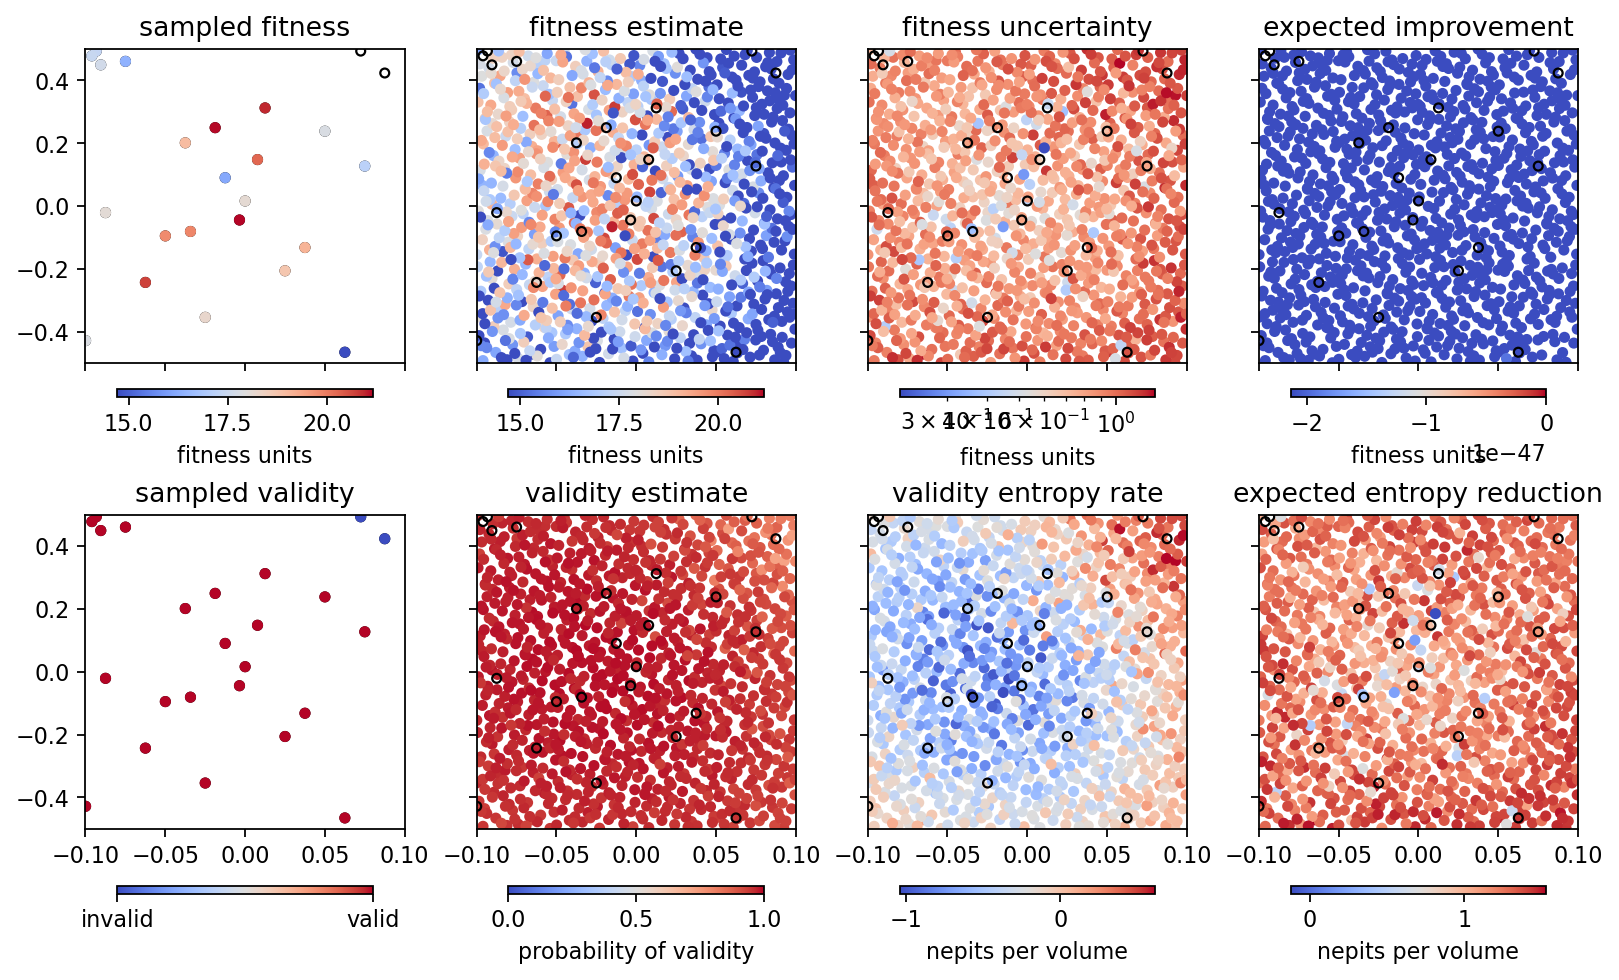

In [4]:
boa.plot_state()